## Image Segmentation
Segmentation partitions an image into regions having similar visual appearance corresponding to parts of object.
We will try to extract the most dominant 'K' Colors using K-Means.
We can apply K-Means with each pixel will reassigned to the colset of the K Colors , leading to segmentation.

In [1]:
# Read one image
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# cv2 reads an image in BGR Format
im = cv2.imread('image.jpg')
# convert from BGR to RGB
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(3184, 4350, 3)


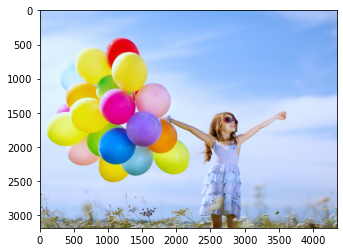

In [3]:
# show image as RGB format
plt.imshow(im)
plt.show()

In [4]:
# We want to flatten each channel of image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)
# we got 3 linear array for each color i.e. for red blue and green 

(13850400, 3)


In [5]:
from sklearn.cluster import KMeans

In [6]:
dominant_colors  = 20;
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=20)

In [7]:
centers = km.cluster_centers_
# RBG values 
centers

array([[127.26178586, 177.58359138, 245.72922911],
       [129.30204975, 115.7587792 ,  82.89361585],
       [175.2525368 , 203.32477861, 248.67196262],
       [223.40516607, 211.17031663,  12.88915177],
       [220.54947771,  12.30117409, 143.23704705],
       [199.79237407, 218.67537697, 253.81325965],
       [185.93657118, 153.45466435, 133.85286531],
       [  6.26374453, 115.52991923, 218.25511275],
       [ 85.61620368,  61.25047324,  29.80220411],
       [223.90300965,  11.61406708,  20.00739593],
       [147.37158774, 103.40778615, 223.80611538],
       [121.95082609, 140.26788337, 159.3897534 ],
       [224.41755195, 229.92997636, 125.87150182],
       [221.36075706, 132.30547083,  15.54398497],
       [218.78291246, 185.28973343, 199.44866951],
       [148.8976912 , 190.72036286, 252.22096962],
       [130.2116818 , 195.54405872,  23.91295548],
       [154.98828937, 174.28390947, 207.97928213],
       [225.40178699, 223.22077763,  68.77889274],
       [215.78527659, 232.90727

In [8]:
centers = np.array(centers , dtype = 'uint8')
centers
# these are the RGB values for a particular dominnat color

array([[127, 177, 245],
       [129, 115,  82],
       [175, 203, 248],
       [223, 211,  12],
       [220,  12, 143],
       [199, 218, 253],
       [185, 153, 133],
       [  6, 115, 218],
       [ 85,  61,  29],
       [223,  11,  20],
       [147, 103, 223],
       [121, 140, 159],
       [224, 229, 125],
       [221, 132,  15],
       [218, 185, 199],
       [148, 190, 252],
       [130, 195,  23],
       [154, 174, 207],
       [225, 223,  68],
       [215, 232, 253]], dtype=uint8)

#### Plot what all color are these ?

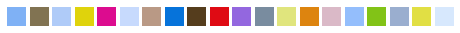

In [9]:
# I am going to plot 6 boxes each having differnt color
# Subplotting
i = 1
# ye just size a ak box ka ki kitna chahiye
# you can skip this also
plt.figure(0,figsize=(8,2))

colors = []

for each_col in centers :
    # here 1 row having 6 columns and we are in ith box 
    plt.subplot(1,20,i)
    plt.axis("off")
    i = i + 1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3) , dtype = 'uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()
# Here we have extracted the most dominant colors    

In [10]:
colors

[array([127, 177, 245], dtype=uint8),
 array([129, 115,  82], dtype=uint8),
 array([175, 203, 248], dtype=uint8),
 array([223, 211,  12], dtype=uint8),
 array([220,  12, 143], dtype=uint8),
 array([199, 218, 253], dtype=uint8),
 array([185, 153, 133], dtype=uint8),
 array([  6, 115, 218], dtype=uint8),
 array([85, 61, 29], dtype=uint8),
 array([223,  11,  20], dtype=uint8),
 array([147, 103, 223], dtype=uint8),
 array([121, 140, 159], dtype=uint8),
 array([224, 229, 125], dtype=uint8),
 array([221, 132,  15], dtype=uint8),
 array([218, 185, 199], dtype=uint8),
 array([148, 190, 252], dtype=uint8),
 array([130, 195,  23], dtype=uint8),
 array([154, 174, 207], dtype=uint8),
 array([225, 223,  68], dtype=uint8),
 array([215, 232, 253], dtype=uint8)]

### Segmenting Our Original Image

In [11]:
# Make a new iamge with same shape as original
new_img = np.zeros((3184*4350, 3) , dtype = 'uint8')
print(new_img.shape)

(13850400, 3)


In [12]:
km.labels_

array([2, 2, 2, ..., 8, 1, 1])

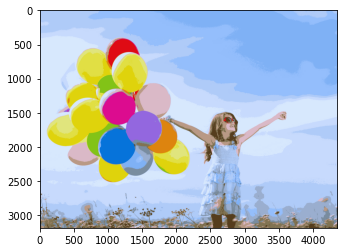

In [13]:
# we will iterate over every pixel and will check what is the closest center to this pixel 
for ix in range(new_img.shape[0]) :
    # color put kar rahe h hum isme according to color dominant
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()